In [1]:
import wrangle as w 
import os 
from env import get_db_url

import pandas as pd 
import numpy as np

from collections import Counter

from sklearn.model_selection import train_test_split

from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns

# feature selection imports
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# import scaling methods
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
from scipy import stats

# import modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

import mitosheet
import folium
from folium.plugins import FastMarkerCluster

In [2]:
train = w.get_exploration_data()

Using cached CSV
The following 34 columns were dropped because they were missing more than 50.0% of data: 
['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'regionidneighborhood', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories', 'fireplaceflag', 'taxdelinquencyflag', 'taxdelinquencyyear', 'airconditioningdesc', 'architecturalstyledesc', 'buildingclassdesc', 'storydesc', 'typeconstructiondesc']

0 rows were dropped because they were missing more than 50.0% of data
Yearbuilt converted to age. 



In [4]:
import mitosheet
mitosheet.sheet(train, analysis_to_replay="id-flbxtpdiss")

MitoWidget(analysis_data_json='{"analysisName": "id-wmweirulue", "analysisToReplay": {"analysisName": "id-flbx…

In [9]:
folium_map = folium.Map(location=[34.0522, -118.2437])
folium.Map()

FastMarkerCluster(data=list(zip(train['latitude'].values, train['longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

In [10]:
train.dtypes

bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
fips                            float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
regionidcity                      int64
regionidzip                       int64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64
landtaxvaluedollarcnt           float64
taxamount                       float64
censustractandblock             float64
logerror                        float64
age                               int64
county                           object
taxrate                         float64
structure_cost_per_sqft         float64
land_cost_per_sqft              float64
fiscal_quarter                    int64
dtype: object

<Figure size 720x360 with 0 Axes>

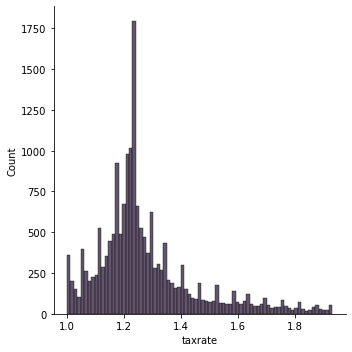

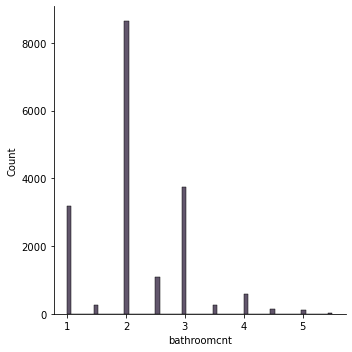

In [46]:
plt.figure(figsize=(10,5))
sns.displot(train.taxrate)

sns.displot(train.bathroomcnt)

In [ ]:
# taxrate and bathroom count have similar distributions, right-skewed.

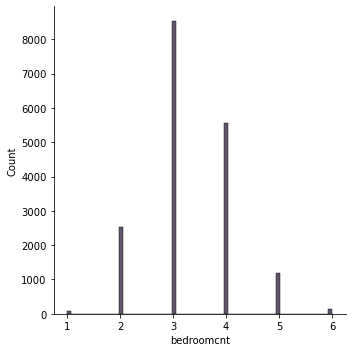

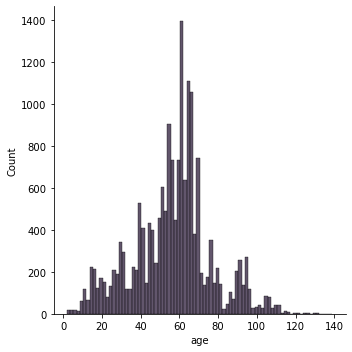

In [45]:
sns.displot(train.bedroomcnt)
sns.displot(train.age)

<Figure size 1080x360 with 0 Axes>

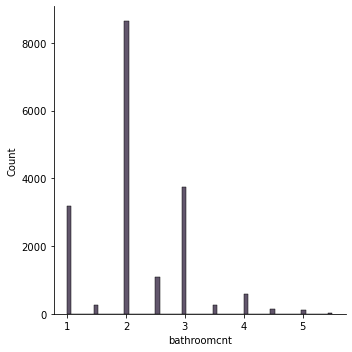

In [34]:
# Again, quite similar distributions, closer to normal, but still right skewed past the mean

As logerror is the target, first I'll take a cursory glance at its interactions among a few variables, starting with counties. 
#### Does logerror notably differentiate among the three Greater Los Angeles counties in this dataframe: Los Angeles, Orange, and Ventura?

Text(0.5, 1.0, 'County v. Log Error')

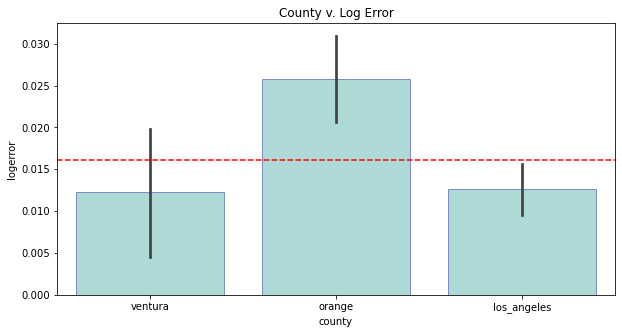

In [14]:
p = plt.figure(figsize=(10,5))
p = sns.barplot(x= train.county, y= train.logerror,  alpha=.4, color='lightseagreen', edgecolor = 'darkblue')
overall_rate = train.logerror.mean()
p = plt.axhline(overall_rate, ls='--', color='red', )
plt.title('County v. Log Error')

Hypothesis Testing - ANOVA       
$H0$ - Differences in logerror among properties by county is insignificant.    
$Ha$ - Logerror differs significantly among Los Ventura, Orange, and Los Angeles

In [15]:
α = 0.05
F, p = stats.f_oneway(train.logerror[train.fips == 6111], train.logerror[train.fips == 6037], train.logerror[train.fips == 6059])
F, p

(10.468973966236874, 2.8577230899647764e-05)

In [17]:
null_hypothesis = 'Differences in logerror among properties by county is insignificant.'
alternative_hypothesis = 'Logerror differs significantly among Los Ventura, Orange, and Los Angeles'
if p > α:
    print("We fail to reject the null hypothesis:", null_hypothesis)
else:
    print("We reject the null hypothesis, so", alternative_hypothesis)

We reject the null hypothesis, so Logerror differs significantly among Los Ventura, Orange, and Los Angeles


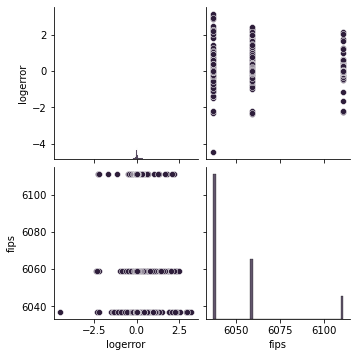

In [20]:
sns.set_palette("mako")
sns.pairplot(train[['logerror', 'fips']])  